In [2]:
import random
import numpy as np
from data_process import get_CIFAR10_data, get_MUSHROOM_data
from scipy.spatial import distance
from svm import SVM
%matplotlib inline

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Loading Mushroom

In the following cells we determine the splitting of the mushroom dataset.
<br /> TRAINING + VALIDATION = 0.8, TESTING = 0.2

In [3]:
# TRAINING = 0.6 indicates 60% of the data is used as the training dataset.
VALIDATION = 0.2

In [4]:
data = get_MUSHROOM_data(VALIDATION)
X_train_MR, y_train_MR = data['X_train'], data['y_train']
X_val_MR, y_val_MR = data['X_val'], data['y_val']
X_test_MR, y_test_MR = data['X_test'], data['y_test']
n_class_MR = len(np.unique(y_test_MR))

print("Number of train samples: ", X_train_MR.shape[0])
print("Number of val samples: ", X_val_MR.shape[0])
print("Number of test samples: ", X_test_MR.shape[0])

Number of train samples:  4874
Number of val samples:  1625
Number of test samples:  1625


### Get Accuracy

This function computes how well your model performs using accuracy as a metric.

In [5]:
def get_acc(pred, y_test):
    return np.sum(y_test == pred) / len(y_test) * 100

# Support Vector Machines (with SGD)

Next, you will implement a "soft margin" SVM. In this formulation you will maximize the margin between positive and negative training examples and penalize margin violations using a hinge loss.

We will optimize the SVM loss using SGD. This means you must compute the loss function with respect to model weights. You will use this gradient to update the model weights.

SVM optimized with SGD has 3 hyperparameters that you can experiment with:
- **Learning rate** - similar to as defined above in Perceptron, this parameter scales by how much the weights are changed according to the calculated gradient update. 
- **Epochs** - similar to as defined above in Perceptron.
- **Regularization constant** - Hyperparameter to determine the strength of regularization. In this case it is a coefficient on the term which maximizes the margin. You could try different values. The default value is set to 0.05.

You will implement the SVM using SGD in the **models/svm.py**

The following code: 
- Creates an instance of the SVM classifier class 
- The train function of the SVM class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

## Train SVM on Mushroom

In [34]:
lr = 0.00015
n_epochs = 10000
reg_const = 100

svm_MR = SVM(n_class_MR, lr, n_epochs, reg_const)
svm_MR.train(X_train_MR, y_train_MR)

In [35]:
pred_svm = svm_MR.predict(X_train_MR)
print('The training accuracy is given by: %f' % (get_acc(pred_svm, y_train_MR)))

The training accuracy is given by: 94.583504


### Validate SVM on Mushroom

In [36]:
pred_svm = svm_MR.predict(X_val_MR)
print('The validation accuracy is given by: %f' % (get_acc(pred_svm, y_val_MR)))

The validation accuracy is given by: 93.969231


## Test SVM on Mushroom

In [37]:
pred_svm = svm_MR.predict(X_test_MR)
print('The testing accuracy is given by: %f' % (get_acc(pred_svm, y_test_MR)))

The testing accuracy is given by: 94.215385


0 1e-05
1 1.2067926406393289e-05
2 1.4563484775012445e-05
3 1.757510624854793e-05
4 2.1209508879201926e-05
5 2.559547922699533e-05
6 3.0888435964774785e-05
7 3.727593720314938e-05
8 4.498432668969444e-05
9 5.4286754393238594e-05
10 6.55128556859551e-05
11 7.906043210907701e-05
12 9.540954763499944e-05
13 0.00011513953993264469
14 0.00013894954943731373
15 0.00016768329368110067
16 0.00020235896477251554
17 0.000244205309454865
18 0.00029470517025518097
19 0.00035564803062231287
20 0.00042919342601287783
21 0.0005179474679231213
22 0.0006250551925273969
23 0.0007543120063354615
24 0.0009102981779915217
25 0.0010985411419875584
26 0.0013257113655901081
27 0.0015998587196060573
28 0.0019306977288832496
29 0.002329951810515372
30 0.002811768697974228
31 0.0033932217718953264
32 0.004094915062380423
33 0.004941713361323833
34 0.005963623316594642
35 0.007196856730011514
36 0.00868511373751352
37 0.010481131341546853
38 0.012648552168552958
39 0.015264179671752318
40 0.018420699693267144
41 

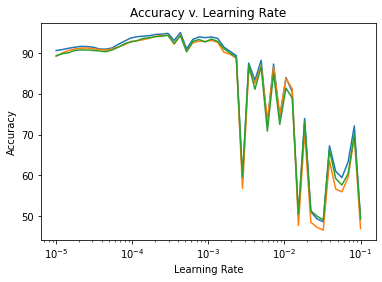

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title("Accuracy v. Learning Rate")
ax.set_xlabel("Learning Rate")
ax.set_ylabel("Accuracy")

learning_steps = np.logspace(np.log10(.00001), np.log10(.1), num=50)
accuracies = []
for i, learning_step in enumerate(learning_steps):
    svm = SVM(n_class_MR, learning_step, n_epochs, reg_const)
    svm.train(X_train_MR, y_train_MR)
    accuracies.append(
        (
            get_acc(svm.predict(X_train_MR), y_train_MR),
            get_acc(svm.predict(X_test_MR), y_test_MR),
            get_acc(svm.predict(X_val_MR), y_val_MR),
        )
    )
    print(i, learning_step)
ax.set_xscale("log")
ax.plot(learning_steps, [y[0] for y in accuracies], label = "Training")
ax.plot(learning_steps, [y[1] for y in accuracies], label = "Testing")
ax.plot(learning_steps, [y[2] for y in accuracies], label = "Validation")

0 0.01
1 0.013257113655901088
2 0.017575106248547922
3 0.023299518105153717
4 0.030888435964774818
5 0.040949150623804255
6 0.054286754393238594
7 0.07196856730011521
8 0.09540954763499938
9 0.12648552168552957
10 0.16768329368110083
11 0.22229964825261944
12 0.29470517025518095
13 0.3906939937054617
14 0.517947467923121
15 0.6866488450043002
16 0.9102981779915218
17 1.2067926406393288
18 1.5998587196060574
19 2.1209508879201904
20 2.8117686979742307
21 3.727593720314938
22 4.941713361323833
23 6.551285568595509
24 8.68511373751352
25 11.513953993264469
26 15.264179671752334
27 20.235896477251575
28 26.826957952797247
29 35.564803062231285
30 47.14866363457394
31 62.505519252739695
32 82.86427728546842
33 109.85411419875572
34 145.63484775012444
35 193.06977288832496
36 255.95479226995332
37 339.32217718953297
38 449.8432668969444
39 596.3623316594636
40 790.6043210907702
41 1048.1131341546852
42 1389.4954943731361
43 1842.0699693267163
44 2442.05309454865
45 3237.45754281764
46 4291.9

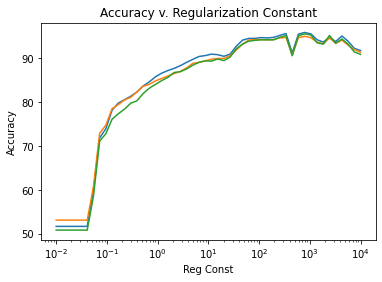

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title("Accuracy v. Regularization Constant")
ax.set_xlabel("Reg Const")
ax.set_ylabel("Accuracy")

reg_steps = np.logspace(np.log10(.01), np.log10(10000), num=50)
accuracies = []
for i, reg_step in enumerate(reg_steps):
    svm = SVM(n_class_MR, lr, n_epochs, reg_step)
    svm.train(X_train_MR, y_train_MR)
    accuracies.append(
        (
            get_acc(svm.predict(X_train_MR), y_train_MR),
            get_acc(svm.predict(X_test_MR), y_test_MR),
            get_acc(svm.predict(X_val_MR), y_val_MR),
        )
    )
    print(i, reg_step)
ax.set_xscale("log")
ax.plot(reg_steps, [y[0] for y in accuracies], label = "Training")
ax.plot(reg_steps, [y[1] for y in accuracies], label = "Testing")
ax.plot(reg_steps, [y[2] for y in accuracies], label = "Validation")